In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

app_store_df = pd.read_csv("./app_store.csv")
app_store_df['NPriceD'] = app_store_df.Price.map(lambda x : float(x[1:]))
app_store_df['NSizeM'] = app_store_df.Size.map(lambda x : float(x.rstrip('M').replace(',','')) if(x[-1] == 'M') else float(x.rstrip('k').replace(',',''))/1000)
app_store_df['Installs'] = app_store_df.Installs.map(lambda x : int(x.rstrip('+').replace(',','')))
print(app_store_df.corr())
app_store_df = app_store_df[app_store_df.Installs>=50000].reset_index(drop=True)
app_store_df = app_store_df[app_store_df['Category'].str.contains("GAME|EDUCATION")].reset_index(drop=True)



app_store_df

Rating   Reviews  Installs   NPriceD    NSizeM
Rating    1.000000  0.058658  0.035402 -0.033268  0.045972
Reviews   0.058658  1.000000  0.741567 -0.017392  0.085281
Installs  0.035402  0.741567  1.000000 -0.024050  0.066331
NPriceD  -0.033268 -0.017392 -0.024050  1.000000 -0.013826
NSizeM    0.045972  0.085281  0.066331 -0.013826  1.000000


,App Name,Category,Rating,Reviews,Installs,Size,Price,NPriceD,NSizeM
0,Construction Simulator 2014,GAME_SIMULATION,4.339837,104091,1000000,19M,$0.99,0.99,19.0
1,Ms. PAC-MAN,GAME_ARCADE,4.291110,5534,100000,23M,$3.99,3.99,23.0
2,Geometry Dash,GAME_ARCADE,4.759553,658279,1000000,85M,$1.99,1.99,85.0
3,PAC-MAN Championship Edition,GAME_ARCADE,4.006351,2834,50000,13M,$5.99,5.99,13.0
4,Vector Full,GAME_ARCADE,4.209437,36049,500000,89M,$0.99,0.99,89.0
...,...,...,...,...,...,...,...,...,...
312,Raiden Legacy,GAME_ACTION,4.381977,5393,50000,8.1M,$5.49,5.49,8.1
313,Pool Slide Story,GAME_SIMULATION,4.777273,6820,50000,34M,$4.99,4.99,34.0
314,FINAL FANTASY VII,GAME_ROLE_PLAYING,3.344634,7492,100000,37M,$15.99,15.99,37.0
315,Dr. Panda Train,GAME_EDUCATIONAL,4.100000,360,50000,78M,$3.99,3.99,78.0


In [271]:
#앱 랜덤 조합 만들기
import time
start = time.time()
import random
def make_random_combination():
    out = pd.DataFrame({'NPriceD': [], 'NSizeM': []})
    random_pool = list(range(len(app_store_df)))
    while(True):
        if(out.NPriceD.sum()<=20 and out.NSizeM.sum()<=500):
            index = random_pool.pop(random.randint(0,len(random_pool)-1))
            out = out.append(app_store_df.loc[index],ignore_index=True)
            if(out.NPriceD.sum()>=19 and out.NPriceD.sum()<=20) or (out.NSizeM.sum()<=500 and out.NSizeM.sum()>=450):
                break
        else:
            out.drop(out.tail(1).index,inplace=True)
    print(out.NPriceD.sum(), out.NSizeM.sum())
    if(out.NPriceD.sum() > 20):
        out.drop(out.tail(1).index,inplace=True)
    return out
makelist = []
for i in range(1000):
    print (i)
    makelist.append(make_random_combination())
    
print("time :", time.time() - start)

0
19.440000000000005 347.0
1
19.93 264.0
2
19.97 54.0
3
19.439999999999998 338.0
4
19.97 115.6
5
19.41 323.8
6
19.95 79.8
7
18.92 453.0
8
19.98 55.0
9
19.440000000000005 164.2
10
19.92 258.1
11
19.440000000000005 231.528
12
19.959999999999997 161.6
13
19.93 315.3
14
19.439999999999998 229.0
15
19.92 274.2
16
19.41 305.3
17
19.93 247.0
18
19.950000000000003 261.0
19
19.93 217.0
20
19.44 195.0
21
19.43 318.0
22
19.15 236.5
23
19.94 200.1
24
19.93 290.1
25
19.099999999999998 276.628
26
19.43 242.4
27
19.93 381.0
28
19.959999999999997 143.8
29
19.92 320.0
30
19.92 402.0
31
19.94 257.0
32
19.95 97.6
33
19.429999999999996 298.0
34
19.950000000000003 211.4
35
19.93 300.0
36
19.94 247.0
37
19.669999999999998 280.9
38
19.93 245.9
39
19.93 370.2
40
19.43 324.0
41
19.94 233.1
42
19.44 320.0
43
19.940000000000005 240.0
44
19.950000000000003 157.6
45
19.939999999999998 138.4
46
19.91 338.0
47
19.93 355.5
48
19.74 328.0
49
19.94 148.7
50
19.43 293.0
51
19.92 235.2
52
19.92 217.9
53
19.92 378.0
54
19

<function max>

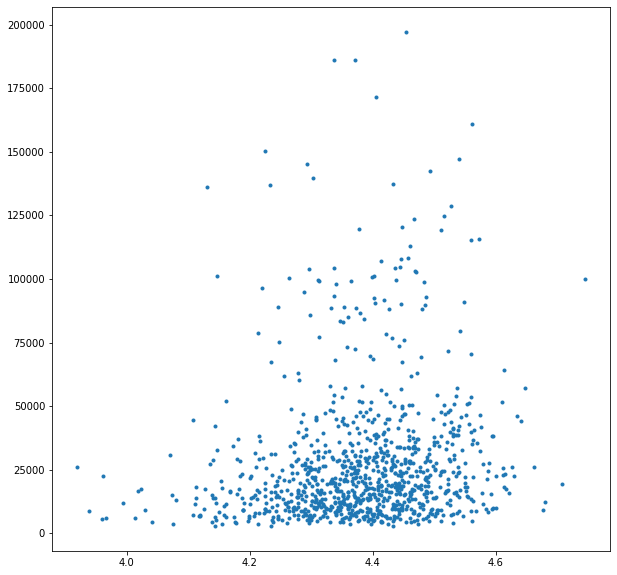

In [264]:
xaxis = list(map(lambda x: x['Rating'].mean(),makelist))
yaxis = list(map(lambda x: x['Reviews'].mean(),makelist))
plt.figure(figsize=(10,10))
plt.plot(xaxis,yaxis, 'o', markersize=3)
max

In [269]:
makelist[435]

,NPriceD,NSizeM,App Name,Category,Installs,Price,Rating,Reviews,Size
0,0.99,5.7,Backflip Madness,GAME_ARCADE,500000.0,$0.99,4.262679,26462.0,5.7M
1,1.49,49.0,Earn to Die,GAME_RACING,1000000.0,$1.49,4.517815,79708.0,49M
2,1.99,23.0,Rusted Warfare - RTS Strategy,GAME_STRATEGY,50000.0,$1.99,4.771031,4529.0,23M
3,7.99,111.0,Stardew Valley,GAME_ROLE_PLAYING,100000.0,$7.99,4.631342,10465.0,111M
4,0.99,82.0,Rush Rally 2,GAME_RACING,50000.0,$0.99,4.471492,3385.0,82M
5,2.99,50.0,Rummikub,GAME_BOARD,100000.0,$2.99,3.866951,3758.0,50M
6,0.99,39.0,Ricky Carmichael's Motocross,GAME_RACING,100000.0,$0.99,3.925390,5388.0,39M
7,0.99,43.0,Tap tap cartoonist - Cartoon999 (VIP),GAME_SIMULATION,500000.0,$0.99,4.365287,3745.0,43M
8,2.99,54.0,My PlayHome School,GAME_CASUAL,50000.0,$2.99,4.565639,1752.0,54M
